In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


#### pre proccessing

In [135]:
df=pd.read_csv("C:\MyFILES\Decision tree\CICDDoS2019Combined.csv")


C:\Users\nkrdh\AppData\Local\Temp\ipykernel_16012\3422478920.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\MyFILES\Decision tree\CICDDoS2019Combined.csv")


In [136]:
df.dtypes.to_dict()

{'Unnamed: 0': dtype('int64'),
 'Flow ID': dtype('O'),
 ' Source IP': dtype('O'),
 ' Source Port': dtype('int64'),
 ' Destination IP': dtype('O'),
 ' Destination Port': dtype('int64'),
 ' Protocol': dtype('int64'),
 ' Timestamp': dtype('O'),
 ' Flow Duration': dtype('int64'),
 ' Total Fwd Packets': dtype('int64'),
 ' Total Backward Packets': dtype('int64'),
 'Total Length of Fwd Packets': dtype('float64'),
 ' Total Length of Bwd Packets': dtype('float64'),
 ' Fwd Packet Length Max': dtype('float64'),
 ' Fwd Packet Length Min': dtype('float64'),
 ' Fwd Packet Length Mean': dtype('float64'),
 ' Fwd Packet Length Std': dtype('float64'),
 'Bwd Packet Length Max': dtype('float64'),
 ' Bwd Packet Length Min': dtype('float64'),
 ' Bwd Packet Length Mean': dtype('float64'),
 ' Bwd Packet Length Std': dtype('float64'),
 'Flow Bytes/s': dtype('float64'),
 ' Flow Packets/s': dtype('float64'),
 ' Flow IAT Mean': dtype('float64'),
 ' Flow IAT Std': dtype('float64'),
 ' Flow IAT Max': dtype('float64

In [122]:
df.shape

(569650, 88)

In [137]:
for i in df.columns:
    if(df[i]==0).all():
        a=df[i].value_counts()
        print(a)
        df.drop(columns=[i],inplace=True)


 Bwd PSH Flags
0    569650
Name: count, dtype: int64
 Fwd URG Flags
0    569650
Name: count, dtype: int64
 Bwd URG Flags
0    569650
Name: count, dtype: int64
FIN Flag Count
0    569650
Name: count, dtype: int64
 PSH Flag Count
0    569650
Name: count, dtype: int64
 ECE Flag Count
0    569650
Name: count, dtype: int64
Fwd Avg Bytes/Bulk
0    569650
Name: count, dtype: int64
 Fwd Avg Packets/Bulk
0    569650
Name: count, dtype: int64
 Fwd Avg Bulk Rate
0    569650
Name: count, dtype: int64
 Bwd Avg Bytes/Bulk
0    569650
Name: count, dtype: int64
 Bwd Avg Packets/Bulk
0    569650
Name: count, dtype: int64
Bwd Avg Bulk Rate
0    569650
Name: count, dtype: int64


In [138]:
df.shape

(569650, 76)

In [144]:
df = df.replace([np.inf, -np.inf], np.nan)

In [145]:
df.dropna(inplace=True)

In [146]:
df.shape

(539840, 76)

<Axes: xlabel=' Label'>

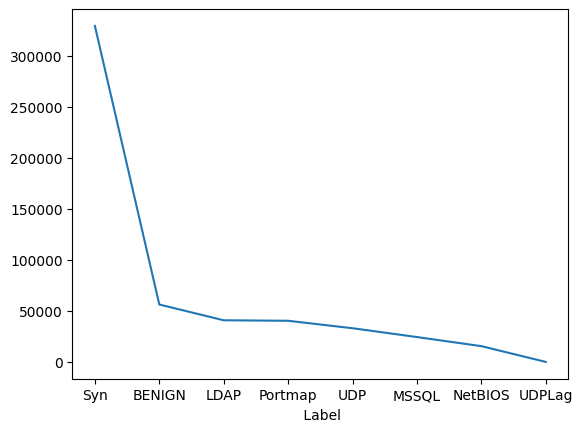

In [147]:
vc=df[' Label'].value_counts()
vc.plot()

In [148]:
vc

 Label
Syn        329162
BENIGN      56306
LDAP        40871
Portmap     40372
UDP         33083
MSSQL       24436
NetBIOS     15527
UDPLag         83
Name: count, dtype: int64

In [149]:
df['Timestamp']=pd.to_datetime(df[' Timestamp'])

In [150]:
df['date'] = df['Timestamp']# Extract only the date
df['time'] = df['Timestamp'].dt.time  # Extract only the time
df['year'] = df['Timestamp'].dt.year  # Extract the year
df['month'] = df['Timestamp'].dt.month  # Extract the month
df['day'] = df['Timestamp'].dt.day  # Extract the day

In [151]:
df.dtypes.to_dict()

{'Unnamed: 0': dtype('int64'),
 'Flow ID': dtype('O'),
 ' Source IP': dtype('O'),
 ' Source Port': dtype('int64'),
 ' Destination IP': dtype('O'),
 ' Destination Port': dtype('int64'),
 ' Protocol': dtype('int64'),
 ' Timestamp': dtype('O'),
 ' Flow Duration': dtype('int64'),
 ' Total Fwd Packets': dtype('int64'),
 ' Total Backward Packets': dtype('int64'),
 'Total Length of Fwd Packets': dtype('float64'),
 ' Total Length of Bwd Packets': dtype('float64'),
 ' Fwd Packet Length Max': dtype('float64'),
 ' Fwd Packet Length Min': dtype('float64'),
 ' Fwd Packet Length Mean': dtype('float64'),
 ' Fwd Packet Length Std': dtype('float64'),
 'Bwd Packet Length Max': dtype('float64'),
 ' Bwd Packet Length Min': dtype('float64'),
 ' Bwd Packet Length Mean': dtype('float64'),
 ' Bwd Packet Length Std': dtype('float64'),
 'Flow Bytes/s': dtype('float64'),
 ' Flow Packets/s': dtype('float64'),
 ' Flow IAT Mean': dtype('float64'),
 ' Flow IAT Std': dtype('float64'),
 ' Flow IAT Max': dtype('float64

In [152]:
X = df.drop(columns=" Label")
y = df[" Label"]


In [153]:
X.drop(columns='Unnamed: 0',inplace=True)
X.drop(columns=' Timestamp',inplace=True)
X.drop(columns='Timestamp',inplace=True)

In [154]:

#removing categorical data
for i in X.columns:
    if (X[i].dtype==object):
        X.drop(columns=[i],inplace=True)


In [162]:
X['date'] = X['date'].astype('int64') / 10**9

In [163]:
X.dtypes.to_dict()

{' Source Port': dtype('int64'),
 ' Destination Port': dtype('int64'),
 ' Protocol': dtype('int64'),
 ' Flow Duration': dtype('int64'),
 ' Total Fwd Packets': dtype('int64'),
 ' Total Backward Packets': dtype('int64'),
 'Total Length of Fwd Packets': dtype('float64'),
 ' Total Length of Bwd Packets': dtype('float64'),
 ' Fwd Packet Length Max': dtype('float64'),
 ' Fwd Packet Length Min': dtype('float64'),
 ' Fwd Packet Length Mean': dtype('float64'),
 ' Fwd Packet Length Std': dtype('float64'),
 'Bwd Packet Length Max': dtype('float64'),
 ' Bwd Packet Length Min': dtype('float64'),
 ' Bwd Packet Length Mean': dtype('float64'),
 ' Bwd Packet Length Std': dtype('float64'),
 'Flow Bytes/s': dtype('float64'),
 ' Flow Packets/s': dtype('float64'),
 ' Flow IAT Mean': dtype('float64'),
 ' Flow IAT Std': dtype('float64'),
 ' Flow IAT Max': dtype('float64'),
 ' Flow IAT Min': dtype('float64'),
 'Fwd IAT Total': dtype('float64'),
 ' Fwd IAT Mean': dtype('float64'),
 ' Fwd IAT Std': dtype('float

#### Feature selection - FILTER

In [173]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Assume X and y are your features and target
selector = SelectKBest(score_func=mutual_info_classif, k=40)
X_new = selector.fit_transform(X, y)

# Get the boolean mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = X.columns[selected_features_mask]
print("Selected features:", selected_feature_names)

# Update X to include only the selected features
X = X[selected_feature_names]

Selected features: Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', 'Bwd Packet Length Max',
       ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Max', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' ACK Flag Count',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', ' Subflow Fwd Bytes',
       ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', ' Inbound',
       'date'],
      dtype='object')

In [181]:
X.shape


(539840, 40)

#### HYBRID

In [182]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model = DecisionTreeClassifier()

# Perform RFE
rfe = RFE(model, n_features_to_select=15)
X_new = rfe.fit_transform(X, y)

# Get the boolean mask of selected features
selected_features_mask = rfe.get_support()

# Get the names of the selected features
selected_feature_names = X.columns[selected_features_mask]
print("Selected features:", selected_feature_names)

# Update X to include only the selected features
X = X[selected_feature_names]


Selected features: Index([' Source Port', ' Destination Port', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       'Fwd IAT Total', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' ACK Flag Count', ' Fwd Header Length.1',
       'Init_Win_bytes_forward', ' min_seg_size_forward', 'date'],
      dtype='object')


#### Model train

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [185]:

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42,max_depth=16)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred = dtree.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9972677089508002


#### Result

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming you have y_test (true labels) and y_pred (predicted labels)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.9973
Precision: 0.9973
Recall: 0.9973
F1 Score: 0.9972
Confusion Matrix:
[[11241     0     1     0     1     0     0     0]
 [    0  8089     0     0     0     0     0     0]
 [    0     0  4812     0     0     0     0     0]
 [    0     0     0  2961   258     0     0     0]
 [    2     0     0    29  7965     0     0     0]
 [    2     0     0     0     0 65935     0     0]
 [    0     0     0     0     0     1  6653     0]
 [    0     0     0     0     0     1     0    17]]
Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     11243
        LDAP       1.00      1.00      1.00      8089
       MSSQL       1.00      1.00      1.00      4812
     NetBIOS       0.99      0.92      0.95      3219
     Portmap       0.97      1.00      0.98      7996
         Syn       1.00      1.00      1.00     65937
         UDP       1.00      1.00      1.00      6654
      UDPLag       1.00      0.94      0.97       

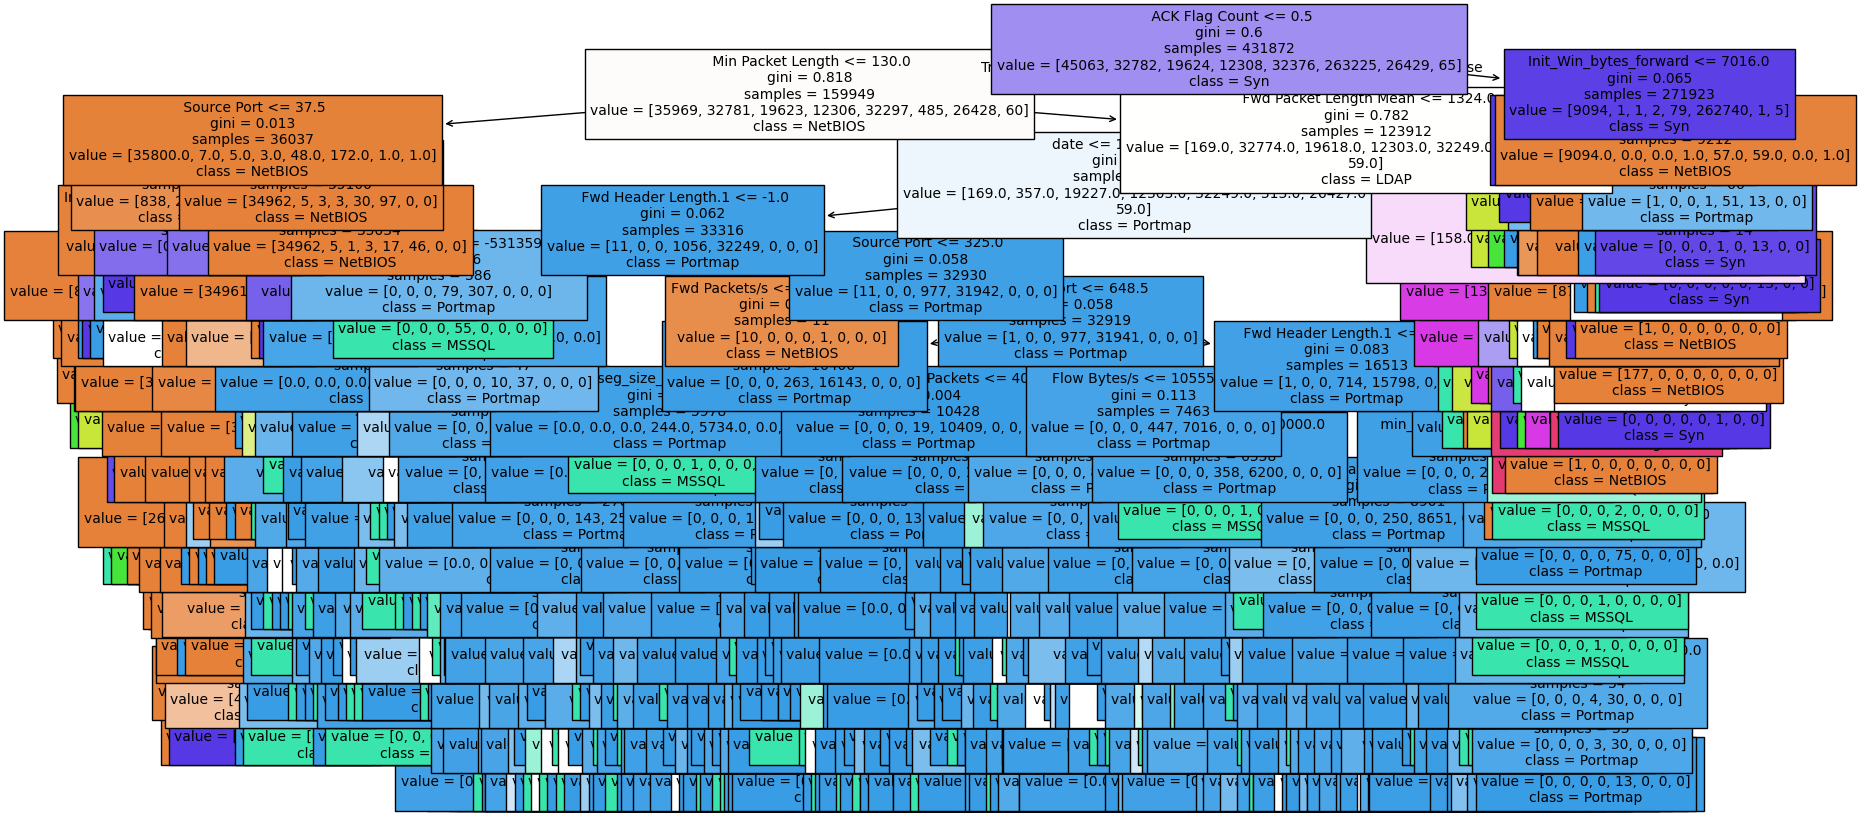

In [186]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the unique class labels from the target variable
class_names = y.unique().tolist()  # Convert unique labels to a list

plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=class_names, fontsize=10)
plt.show()
